<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:##45a8cc">Case Study 1<span style="font-family: Arial; font-weight:bold;font-size:0.9em;color:###d39219">(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.1 Import the necessary librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.2 Import the train and test datasets in  pandas dataframe

In [2]:
train = pd.read_csv('train-day4.csv')
test = pd.read_csv('test-day4.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.3 Display the first five rows of the train dataset.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.4 Display the first five rows of the test dataset.

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.5 Check the Shape of Train and Test dataframe ?

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.6 Save the 'Id' column

In [6]:
train_ID = train['Id']
test_ID = test['Id']

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [7]:
train.drop(columns='Id', inplace=True)
test.drop(columns='Id', inplace=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.8 Check the new shape of the dataframes ?

In [8]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.9 Data Processing

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9a)Scatter plot to check for Outliers GrLivArea Vs SalePrice.And  write your observation?

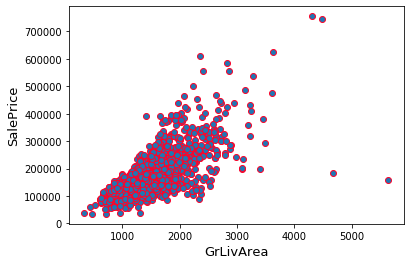

In [9]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'],edgecolors='#fc052a')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Observation :  We have two outliers

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 b) Delete the outliers.And write your observation?

In [10]:
train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<300000)].index, inplace=True)

In [11]:
#train[(train['GrLivArea'] > 4000) & (train['SalePrice']<300000)].index

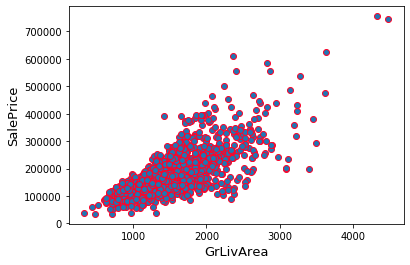

In [12]:
# create subplots
fig, ax = plt.subplots()
#create scatter plots
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'],edgecolors='#fc052a')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


Observation: We have deleted the bottom two outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 c)Check the Outliers using a box plot  for train['GrLivArea'].And write your observation?

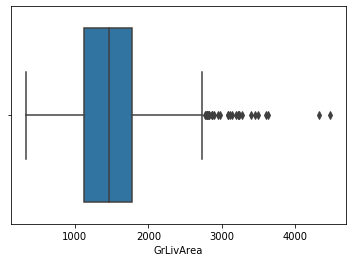

In [13]:
sns.boxplot(train['GrLivArea'])
plt.show()

In [14]:
ul = train['GrLivArea'].quantile(0.75) + 1.5*(train['GrLivArea'].quantile(0.75) - train['GrLivArea'].quantile(0.25))
ul

2747.25

In [15]:
train = train.drop(train[(train['GrLivArea']) > 2600].index)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.9 d)Check Again for Outliers using a box plot  for train['GrLivArea'].And write your observation?

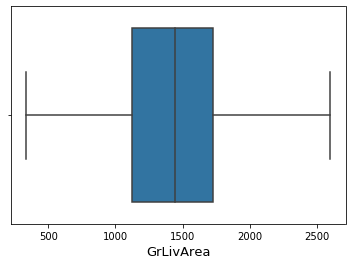

In [16]:
sns.boxplot(train['GrLivArea'])
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.10 Check the skewness for saleprice.And write your observation?

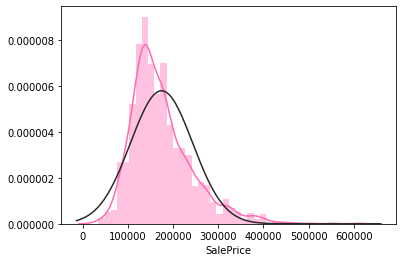

In [17]:
sns.distplot(train['SalePrice'], fit=norm, color='hotpink')
plt.show()

Observation:
    The target variable is right skewed.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.10 a) Apply Log-transformation to the target variable.And write your observation?

In [18]:
train['SalePrice'] = np.log1p(train['SalePrice'])

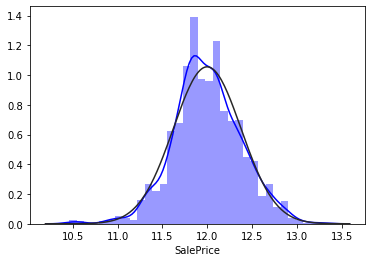

In [19]:
# check for distribution:-

sns.distplot(train['SalePrice'], fit=norm, color='blue')
plt.show()

Observation:
    The skew seems now corrected and the data appears more normally distributed.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.11 Concatenate the train and test data in the same dataframe

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)

C:\Users\Karangula\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [ ]:
# Drop the SalePrice

all_data.drop(['SalePrice'], axis=1, inplace=True)

# We drop SalePrice becoz, it is availbale in only one dataset.

In [23]:
all_data.shape

(2866, 79)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.12 Check for  Missing values?

In [24]:
(all_data.isna().sum()/len(all_data))*100

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley           93.196092
BedroomAbvGr     0.000000
                  ...    
Utilities        0.069784
WoodDeckSF       0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
YrSold           0.000000
Length: 79, dtype: float64

In [25]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#all_data_na
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.790649
MiscFeature,96.441033
Alley,93.196092
Fence,80.390789
FireplaceQu,49.441731
LotFrontage,16.643405
GarageQual,5.478018
GarageCond,5.478018
GarageFinish,5.478018
GarageYrBlt,5.478018


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.13 Plot the missing values using barplot?

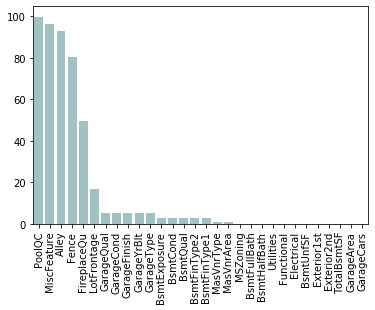

In [26]:
sns.barplot(x=all_data_na.index, y=all_data_na,color='#9bc7c9')
plt.xticks(rotation='90')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.14 Check the Correlation using heatmap.And write your observation?

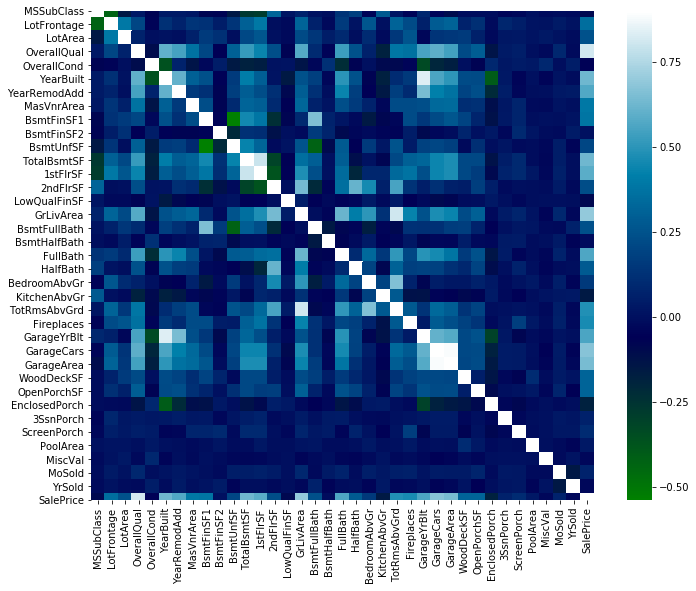

In [27]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='ocean')
plt.show()

Observation:
    
    1. The correlation map shows the independent variable correlating each variables.
    
    2. We can see here Garageyrbit, yearuilt have green color negative correlation.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.15 Imputing missing values

In [28]:
missing_data

,Missing Ratio
PoolQC,99.790649
MiscFeature,96.441033
Alley,93.196092
Fence,80.390789
FireplaceQu,49.441731
LotFrontage,16.643405
GarageQual,5.478018
GarageCond,5.478018
GarageFinish,5.478018
GarageYrBlt,5.478018


In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 79 columns):
1stFlrSF         2866 non-null int64
2ndFlrSF         2866 non-null int64
3SsnPorch        2866 non-null int64
Alley            195 non-null object
BedroomAbvGr     2866 non-null int64
BldgType         2866 non-null object
BsmtCond         2784 non-null object
BsmtExposure     2784 non-null object
BsmtFinSF1       2865 non-null float64
BsmtFinSF2       2865 non-null float64
BsmtFinType1     2787 non-null object
BsmtFinType2     2786 non-null object
BsmtFullBath     2864 non-null float64
BsmtHalfBath     2864 non-null float64
BsmtQual         2785 non-null object
BsmtUnfSF        2865 non-null float64
CentralAir       2866 non-null object
Condition1       2866 non-null object
Condition2       2866 non-null object
Electrical       2865 non-null object
EnclosedPorch    2866 non-null int64
ExterCond        2866 non-null object
ExterQual        2866 non-null object
Exterior1st      286

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [30]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

#### MiscFeature : 
data description says NA means "no misc feature"

In [31]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

#### Alley : 
data description says NA means "no alley access"

In [32]:
all_data['Alley'] = all_data['Alley'].fillna('None')

#### Fence : 
data description says NA means "no fence"

In [33]:
all_data['Fence'] = all_data['Fence'].fillna('None')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.16 Check for  remaining missing values

In [34]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
#all_data_na
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
FireplaceQu,49.441731
LotFrontage,16.643405
GarageCond,5.478018
GarageFinish,5.478018
GarageQual,5.478018


In [35]:
# FireplaceQu - 'None'
# LotFrontage - 'Median'
# GarageCond - 'None'

In [36]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [37]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [38]:
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.17 Check for remaining missing values if any.And write your observation?

In [39]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#all_data_na
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
GarageYrBlt,5.478018
GarageQual,5.478018
GarageFinish,5.478018
GarageType,5.408234
BsmtCond,2.861130


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.18 Feature Engineering

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.18 a) Transforming numerical variables which are categorical in nature

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.18b) Label Encoding categorical variableswhich are ordinal in nature

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:##45a8cc"> 1.19 Introduction to Test and Train


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.20 Extract the independent variable X and dependent variable Y?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##45a8cc"> 1.21 Split the data into train and test set(70/30)?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00ff6a"> THE END